In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive


/content/drive/MyDrive


In [29]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from nltk.tokenize import word_tokenize
import nltk
import gensim
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [30]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df=pd.read_csv('stock_market_crash_2022.csv')


In [32]:
df.head()

,id,text,text_sentiment,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,media,retweetedTweet,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1538666561615015938,When will the #NYSE #stockmarketcrash happen?,Neutral,tradexlnc,"['NYSE', 'stockmarketcrash']",2022-06-19 23:34:29+00:00,10669,0,0,1,0,en,NaN,NaN,NaN,NaN,NaN,NaN
1,1538665013799489536,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,niftymonday,"['stockmarkets', 'stockmarketcrash', 'trading'...",2022-06-19 23:28:20+00:00,100,0,1,8,0,en,NaN,NaN,NaN,NaN,NaN,NaN
2,1538660868027830274,The stock market needs to crash hard to make i...,Negative,kyle132313,"['stockmarketcrash', 'economy', 'rich', 'Fed']",2022-06-19 23:11:52+00:00,0,0,0,0,0,en,NaN,NaN,NaN,NaN,NaN,NaN
3,1538657239849836544,"Those who are ""Buying on DIP"" will very soon b...",Neutral,ChintanRajput16,"['stockmarketcrash', 'StocksToBuy', 'stockstow...",2022-06-19 22:57:27+00:00,54,0,2,2,0,en,NaN,NaN,NaN,NaN,NaN,NaN
4,1538654339044196358,@rdrhwke I wish our so-called President were t...,Positive,DrPCJustice,"['Bidenomics', 'inflation', 'recession', 'stoc...",2022-06-19 22:45:55+00:00,28,0,0,0,0,en,NaN,NaN,NaN,1.538653e+18,https://twitter.com/rdrhwke,"[User(username='rdrhwke', id=43753976, display..."


In [33]:
df = df.dropna(subset=['hashtags']).drop_duplicates()
df = df[df['language'] == 'en']
len(df)

29873

In [43]:
df.head()

,id,text,text_sentiment,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,media,retweetedTweet,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1538666561615015938,When will the #NYSE #stockmarketcrash happen?,Neutral,tradexlnc,"['NYSE', 'stockmarketcrash']",2022-06-19 23:34:29+00:00,10669,0,0,1,0,en,NaN,NaN,NaN,NaN,NaN,NaN
1,1538665013799489536,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,niftymonday,"['stockmarkets', 'stockmarketcrash', 'trading'...",2022-06-19 23:28:20+00:00,100,0,1,8,0,en,NaN,NaN,NaN,NaN,NaN,NaN
2,1538660868027830274,The stock market needs to crash hard to make i...,Negative,kyle132313,"['stockmarketcrash', 'economy', 'rich', 'Fed']",2022-06-19 23:11:52+00:00,0,0,0,0,0,en,NaN,NaN,NaN,NaN,NaN,NaN
3,1538657239849836544,"Those who are ""Buying on DIP"" will very soon b...",Neutral,ChintanRajput16,"['stockmarketcrash', 'StocksToBuy', 'stockstow...",2022-06-19 22:57:27+00:00,54,0,2,2,0,en,NaN,NaN,NaN,NaN,NaN,NaN
4,1538654339044196358,@rdrhwke I wish our so-called President were t...,Positive,DrPCJustice,"['Bidenomics', 'inflation', 'recession', 'stoc...",2022-06-19 22:45:55+00:00,28,0,0,0,0,en,NaN,NaN,NaN,1.538653e+18,https://twitter.com/rdrhwke,"[User(username='rdrhwke', id=43753976, display..."


In [44]:
# Clean text function
def clean_text(text,join=False):
    text = BeautifulSoup(text,'html.parser').get_text()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#(\w+)', r'\1', text)   # Remove hashtags (or keep hashtags but remove '#' symbol)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if len(word) > 2]  # Remove tokens with less than 3 letters
    tokens = [word.lower() for word in tokens]  # Lowercase all tokens
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    if join:
      return ' '.join(tokens)
    return tokens

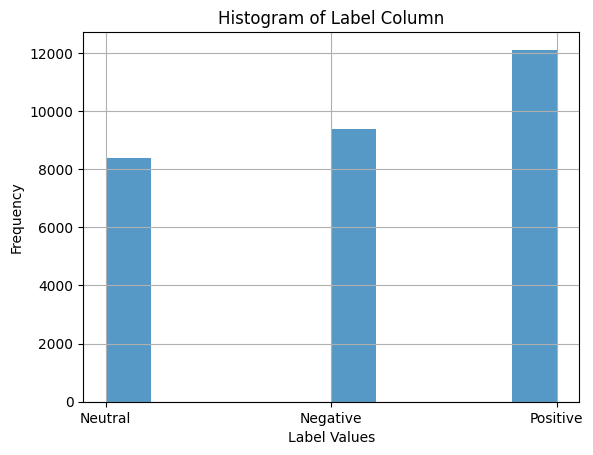

In [35]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'label' is the column name
plt.hist(df['text_sentiment'], bins=10, alpha=0.75)
plt.xlabel('Label Values')
plt.ylabel('Frequency')
plt.title('Histogram of Label Column')
plt.grid(True)
plt.show()

In [36]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
corpus = [' '.join(clean_text(doc)) for doc in df['text']]
corpus_str=' '.join(corpus)

In [53]:
corpus_str

'nyse stockmarketcrash happen aaj gyan company isnt quality company dont buy price low bargainbin companies often produce bargainbin results stockmarkets stockmarketcrash trading investing nifty banknifty stock market needs crash hard make realistic cant keep printing money keep blowing bubble gon pop one way another smh sell people greedy buy people fearful stockmarketcrash economy rich fed buying dip soon become promoters company stockmarketcrash stockstobuy stockstowatch wish socalled president transitory mean really shortterm transitory sayin bidenomics inflation recession stockmarketcrash paul wrote stockmarketcrash predicted inflation war year president wrong must lol school economics stockmarketcrash best explanation damn mask crash money printer brrrr beer expensive fed sobers money shit margin calls must sell btc stagflation shit show huh btc hedge china new money dayum usa lagging shit sherlock much btc like btc buy stockmarketcrash best explanation damn mask crash money prin

In [38]:
from collections import Counter

In [54]:
token_counts = Counter(word_tokenize(corpus_str))

reduced_vocab = [token for token, count in token_counts.items() if count >= 3]

In [56]:

def process_text(text):

    # Tokenize and clean the document
    tokens = clean_text(text)
    # Lemmatize the tokens if they are in the reduced vocabulary
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens if word in reduced_vocab]
    # Combine tokens back into a string
    return ' '.join(lemmatized_tokens)

In [46]:
corpus_str

'stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash bearmarket stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash bearmarket stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash bearmarket stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcrash stockmarketcra

In [57]:

# preparation for sentimental analysis
SA_data = df[['text','text_sentiment']]



SA_data['text_preprocessed'] = SA_data['text'].apply(process_text)
SA_data['text_sentiment'] = SA_data['text_sentiment'].map({'Positive':2,'Neutral':1,'Negative':0})
SA_data.head()

,text,text_sentiment,text_preprocessed
0,When will the #NYSE #stockmarketcrash happen?,1,nyse stockmarketcrash happen
1,Aaj ka gyan:\n\nIf a company isn't a quality c...,0,aaj gyan company isnt quality company dont buy...
2,The stock market needs to crash hard to make i...,0,stock market need crash hard make realistic ca...
3,"Those who are ""Buying on DIP"" will very soon b...",1,buying dip soon become promoter company stockm...
4,@rdrhwke I wish our so-called President were t...,2,wish socalled president transitory mean really...


# "Au-dessus j'ai appliqué preprocessing qui etait fait dans le TP precedent"

On split notre dataset

In [59]:
from sklearn.model_selection import train_test_split

# Séparation des caractéristiques et de la variable cible
X = SA_data['text_preprocessed']
y = SA_data['text_sentiment']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



On creer deux pipelines:
1) Pipeline qui etait fourni par le prof
2) Pipeline qui etait choisi par etudiant

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC()),
])

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])
pipeline.fit(X_train, y_train)
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

Les resultat de solution de prof.

Précision du modèle de PROF:               precision    recall  f1-score   support

           0       0.79      0.73      0.76      3077
           1       0.81      0.86      0.83      2770
           2       0.81      0.83      0.82      4012

    accuracy                           0.80      9859
   macro avg       0.80      0.80      0.80      9859
weighted avg       0.80      0.80      0.80      9859
 
 Accuracy : 0.657673192007303 




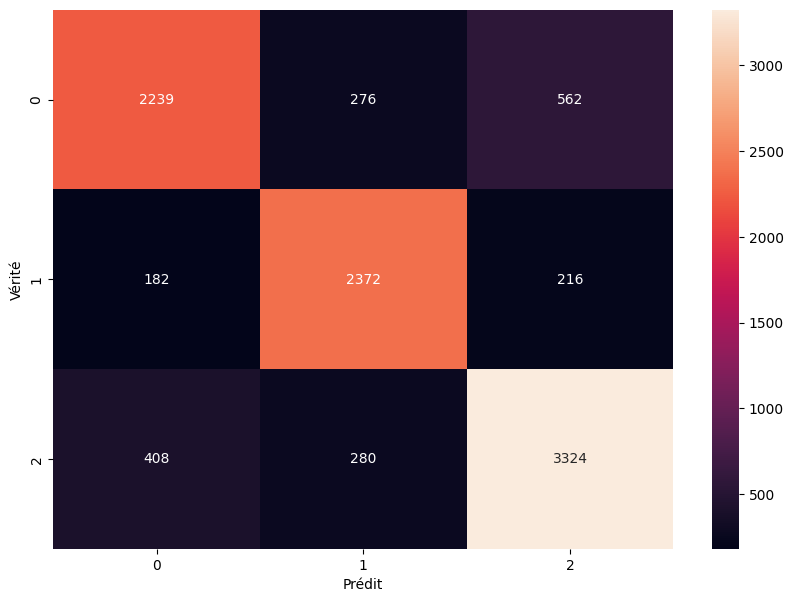

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


prediction_linearsvc = pipeline.predict(X_test)
predictions_bayes = text_clf.predict(X_test)
print(f"Précision du modèle de PROF: {classification_report(y_test,prediction_linearsvc)} \n Accuracy : { accuracy_score(y_test, predictions_bayes)} \n\n")
cm = confusion_matrix(y_test, prediction_linearsvc)

# Tracer la matrice de confusion
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prédit')
plt.ylabel('Vérité')
plt.show()

On voir que le modèle de PROF présente une précision globale de 0.80 avec une répartition comme suit : pour la catégorie 0, la précision est de 0.79, le rappel de 0.73 et le score F1 de 0.76, basé sur 3077 échantillons. Pour la catégorie 1, la précision est de 0.81, le rappel de 0.86 et le score F1 de 0.83, basé sur 2770 échantillons. Pour la catégorie 2, la précision est de 0.81, le rappel de 0.83 et le score F1 de 0.82, basé sur 4012 échantillons. La moyenne pondérée de ces scores donne une précision de 0.80, un rappel de 0.80 et un score F1 de 0.80 pour un total de 9859 échantillons. Cependant, la précision globale du modèle est de 0.657673192007303.Cette présicion nous indique que le modele ne performe pas bien.

Maintenat on va voir la performance de certaines modeles comme en utilisant differents methodes de vectorization (TF-IDF,BoW):
- Random forest
- GBM
- Naive Bayes
- SVM

Pour bien choisir nos hyperparametres on va utiliser grid search avec differents options.

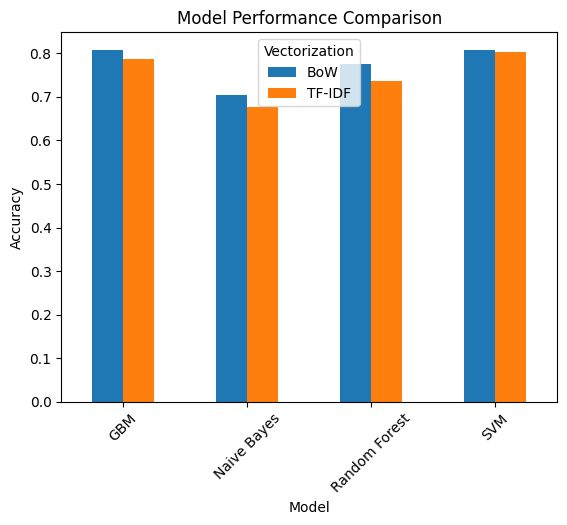

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


# Vectorization
vectorizers = {
    "TF-IDF": TfidfVectorizer(max_features=5000),
    "BoW": CountVectorizer(max_features=5000)
}

model_params = {
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {'n_estimators': [10, 50, 100, 200]}
    },
    "GBM": {
        "model": GradientBoostingClassifier(),
        "params": {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
    },
    "Naive Bayes": {
        "model": MultinomialNB(),
        "params": {'alpha': [0.1, 0.5, 1, 10]}
    },
    "SVM": {
        "model": SVC(),
        "params": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

results = []
classification_reports = {}
predictions = {}

# Applying Vectorization and Model Training with Grid Search
for vect_name, vectorizer in vectorizers.items():
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    for model_name, mp in model_params.items():
        grid_search = GridSearchCV(mp['model'], mp['params'], cv=5)
        grid_search.fit(X_train_vect, y_train)
        y_pred = grid_search.predict(X_test_vect)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        results.append((vect_name, model_name, accuracy))
        classification_reports[(vect_name, model_name)] = report
        predictions[(vect_name, model_name)] = y_pred

# Plotting the results
df_results = pd.DataFrame(results, columns=['Vectorization', 'Model', 'Accuracy'])
df_pivot = df_results.pivot("Model", "Vectorization", "Accuracy")
df_pivot.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# "On peut voir que le modèle le plus performant est le Naive Bayes en utilisant la methode de vectoriser TF-IDF.Le pire perfomant ce'st Random Forest en utilisant BoW"

On va printer notre report de classification

--- Classification Report: Random Forest with TF-IDF ---

              precision    recall  f1-score   support

           0       0.74      0.60      0.66      3077
           1       0.72      0.82      0.76      2770
           2       0.75      0.78      0.76      4012

    accuracy                           0.74      9859
   macro avg       0.74      0.73      0.73      9859
weighted avg       0.74      0.74      0.73      9859



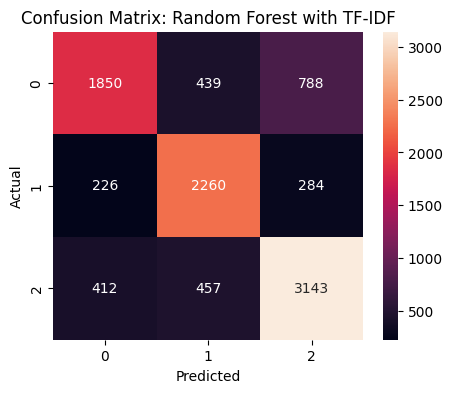

--- Classification Report: GBM with TF-IDF ---

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      3077
           1       0.79      0.84      0.82      2770
           2       0.78      0.82      0.80      4012

    accuracy                           0.79      9859
   macro avg       0.79      0.78      0.78      9859
weighted avg       0.79      0.79      0.78      9859



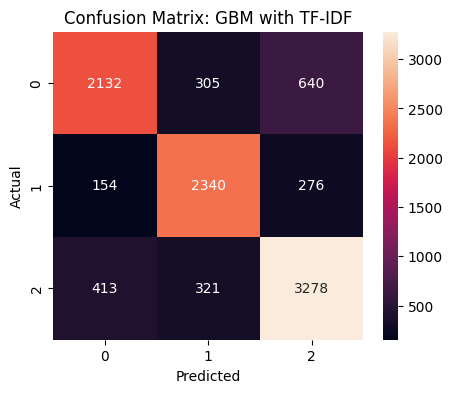

--- Classification Report: Naive Bayes with TF-IDF ---

              precision    recall  f1-score   support

           0       0.68      0.61      0.64      3077
           1       0.80      0.53      0.64      2770
           2       0.63      0.83      0.72      4012

    accuracy                           0.68      9859
   macro avg       0.70      0.66      0.67      9859
weighted avg       0.69      0.68      0.67      9859



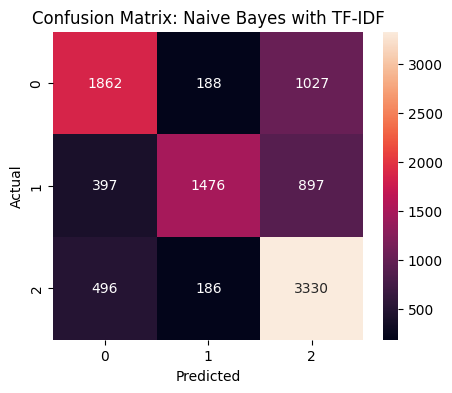

--- Classification Report: SVM with TF-IDF ---

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      3077
           1       0.81      0.87      0.84      2770
           2       0.81      0.82      0.82      4012

    accuracy                           0.80      9859
   macro avg       0.80      0.80      0.80      9859
weighted avg       0.80      0.80      0.80      9859



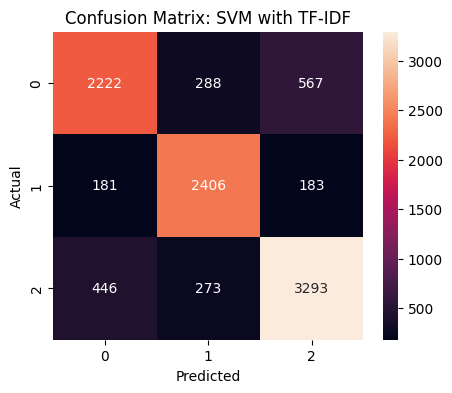

--- Classification Report: Random Forest with BoW ---

              precision    recall  f1-score   support

           0       0.78      0.64      0.71      3077
           1       0.75      0.89      0.82      2770
           2       0.79      0.80      0.80      4012

    accuracy                           0.78      9859
   macro avg       0.78      0.78      0.77      9859
weighted avg       0.78      0.78      0.77      9859



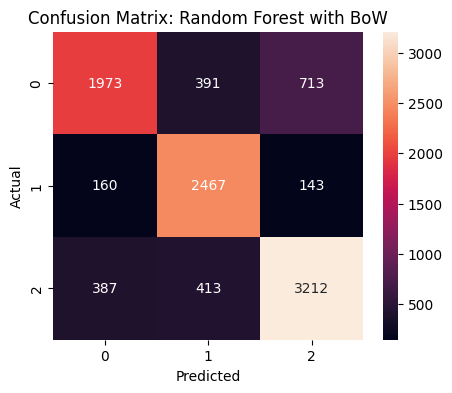

--- Classification Report: GBM with BoW ---

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      3077
           1       0.78      0.92      0.84      2770
           2       0.84      0.81      0.82      4012

    accuracy                           0.81      9859
   macro avg       0.81      0.81      0.81      9859
weighted avg       0.81      0.81      0.81      9859



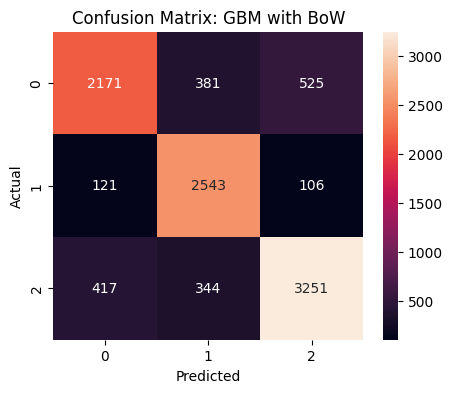

--- Classification Report: Naive Bayes with BoW ---

              precision    recall  f1-score   support

           0       0.65      0.66      0.66      3077
           1       0.76      0.67      0.71      2770
           2       0.71      0.76      0.73      4012

    accuracy                           0.70      9859
   macro avg       0.71      0.70      0.70      9859
weighted avg       0.71      0.70      0.70      9859



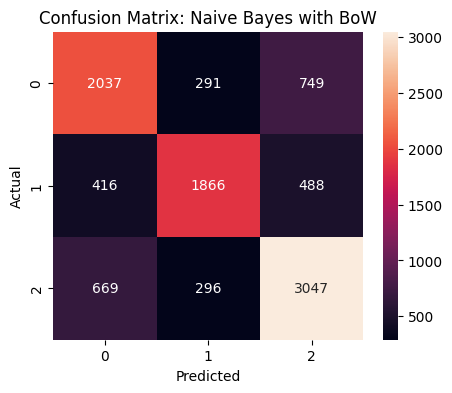

--- Classification Report: SVM with BoW ---

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      3077
           1       0.83      0.88      0.85      2770
           2       0.83      0.81      0.82      4012

    accuracy                           0.81      9859
   macro avg       0.81      0.81      0.81      9859
weighted avg       0.81      0.81      0.81      9859



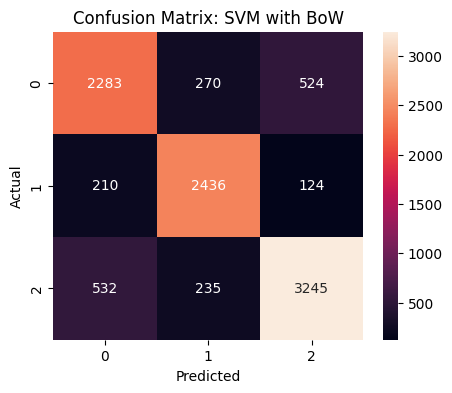

In [64]:
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Printing classification reports and plotting confusion matrices
for key, report in classification_reports.items():
    vectorizer, model = key
    print(f"--- Classification Report: {model} with {vectorizer} ---\n")
    print(report)

    # Plotting the confusion matrix
    y_pred = predictions[key]
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix: {model} with {vectorizer}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#Ici ,on voit que la meilleure soltion dans notre cas est GBM avec BoW vectorization.
La precision est 0.81,
f1-score 0.75 pour Negative reponse
f1-score 0.84 pour Neutral reponse
f1-score 0.82 pour Positive reponse

Ce modele marche mieux en comporaison avec la solution de prof.